Vz= 0.0 meter / second
Az= -9.8 meter / second ** 2
y          2000.0 meter
v    0.0 meter / second
Name: 0, dtype: object
[<Quantity(2000.0, 'meter')>, <Quantity(-9.8, 'meter / second')>]
slopes= (<Quantity(0.0, 'meter / second')>, <Quantity(-9.8, 'meter / second ** 2')>)
Here is the first frame of y:
0     2000.0 meter
1     2000.0 meter
2     1985.3 meter
3     1960.8 meter
4     1926.5 meter
5     1882.4 meter
6     1828.5 meter
7     1764.8 meter
8     1691.3 meter
9     1608.0 meter
10    1514.9 meter
11    1412.0 meter
12    1299.3 meter
13    1176.8 meter
14    1044.5 meter
15     902.4 meter
16     750.5 meter
Name: y, dtype: object
Here is the first frame of v:
0                     0.0 meter / second
1                    -9.8 meter / second
2                   -19.6 meter / second
3     -29.400000000000002 meter / second
4                   -39.2 meter / second
5                   -49.0 meter / second
6                   -58.8 meter / second
7                   -68.6 meter /

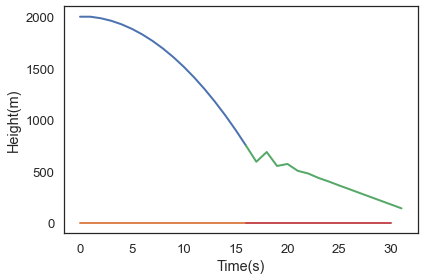

In [16]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
# import functions from the modsim.py module
from modsim import *
m = UNITS.meter
s = UNITS.second
g = 9.8 * m/s**2
init_z = State(y=2000.0 * m, v=0.0 * m/s)
t_fend = 30* s
t_open=15*s
t_opens=16*s
dt = 1* s
system1_z=System(init=init_z,g=g,t_end=t_open,dt=dt)
def slope_func1_z(state, t, system1):
    y,v = state
    dydt = v
    dvdt = -system1.g
    return dydt, dvdt
Vz, Az = slope_func1_z(system1_z.init, 0, system1_z)
print('Vz=',Vz)
print('Az=',Az)
def run_adams(system, slope_func, **options):
    """Computes a numerical solution to a differential equation.
    `system` must contain `init` with initial conditions,
    `t_end` with the end time, and `dt` with the time step.
    `system` may contain `t_0` to override the default, 0
    It can contain any other parameters required by the slope function.
    `options` can be ...
    system: System object
    slope_func: function that computes slopes
    returns: TimeFrame
    """
    # the default message if nothing changes
    msg = "The solver successfully reached the end of the integration interval."
    # get parameters from system
    init, t_0, t_end, dt = check_system(system, slope_func)
    # make the TimeFrame
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt) * get_units(t_end)
    # run the solver
    for t1 in ts:
        if t1==t_0:
            y1 = frame.row[t1]
            print(y1)
            slopes = slope_func(y1, t1, system)
            y2 = [y + slope * dt for y, slope in zip(y1, slopes)]#用于迭代？还是代表元组，两个变量各从两个元组中取值？注意断句？
                                    #y、slope两个变量从zip这个元组中取值？也就是说断句出现了问题？？what the fuck？
            print(y2)
            t2 = t1 + dt
            frame.row[t2] = y2
           
            t3 = t2 + dt
            slopes1 = slope_func(y1,t1,system)
            print('slopes=',slopes1)
            slopes2 = slope_func(y2,t2,system)
            y3=[y+(3*slope2-slope1)*dt/2 for y,slope2,slope1 in zip(y2,slopes2,slopes1)]
            frame.row[t3]=y3
        else:
            t2=t1+dt
            y1=frame.row[t1]
            y2=frame.row[t2]
            slopes1 = slope_func(y1,t1,system)
            slopes2 = slope_func(y2,t2,system)
            y3=[y+(3*slope2-slope1)*dt/2 for y,slope2,slope1 in zip(y2,slopes2,slopes1)]
            t3=t2+dt
            frame.row[t3]=y3
    details=ModSimSeries(dict(message="Success"))
    return frame,details
results1_z, details1_z = run_adams(system1_z, slope_func1_z)
plot(results1_z.y)
decorate(xlabel='Time(s)',ylabel='Height(m)')
x=[0,2,4,6,8,10,12,14,16]
y=[0,0,0,0,0,0,0,0,0]
plot(x,y)
print('Here is the first frame of y:')
print(results1_z.y)
print('Here is the first frame of v:')
print(results1_z.v)
kg= UNITS.kilogram
S = 20.0 * m**2
ρ = 1.225 * kg/m**3
Yp=get_last_value(results1_z.y) 
Vp=get_last_value(results1_z.v)
print('Yp=',Yp)
print('Vp=',Vp)
process_z=State(y=Yp,v=Vp)
system2_z= System(init=process_z, t_end=t_fend,t_0=t_opens, dt=dt) 
def slope_func2_z(state,t,system2):
    y,v=state
    dydt=v
    Drag=0.5*v*v*S*0.05*ρ  
    dvdt=Drag/(85.0*kg)-g
    return dydt, dvdt
Vz1,Az1=slope_func2_z(system2_z.init, 0, system2_z)
results2_z,details2_z=run_adams(system2_z, slope_func2_z) #system2_z相当于给出了初始条件（包括初值，末值等）和步长；                                                          #slope_func2_z相当于给出了微分方程的形式
plot(results2_z.y)
decorate(xlabel='Time(s)',ylabel='Height(m)')
x=[16,18,20,22,24,26,28,30]
y=[0,0,0,0,0,0,0,0]
plot(x,y)
print('Here is the second frame of y:')
print(results2_z.y)
print('Here is the second frame of v:')
print(results2_z.v)
print('Here is the final plot:')

In [2]:
#不return frame试一下，单纯return数值，而不是表格框架？ 